<a href="https://colab.research.google.com/github/WooJungE/About_data/blob/main/0518.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt

In [2]:
x = torch.randn(3,3)
x = x*3
print(x)
print(x.requires_grad)

tensor([[-0.2061, -1.7509,  0.5074],
        [-2.1736,  3.8631,  2.4781],
        [ 1.2746, -1.4416,  5.3105]])
False


In [3]:
x.requires_grad_(True)

tensor([[-0.2061, -1.7509,  0.5074],
        [-2.1736,  3.8631,  2.4781],
        [ 1.2746, -1.4416,  5.3105]], requires_grad=True)

In [4]:
num_data = 1000
num_epoch = 500
x = init.uniform_(torch.Tensor(num_data, 1), -10, 10)
y=2*x+3
noise = init.normal_(torch.FloatTensor(num_data, 1),std=0.2)
y_noise = y+noise

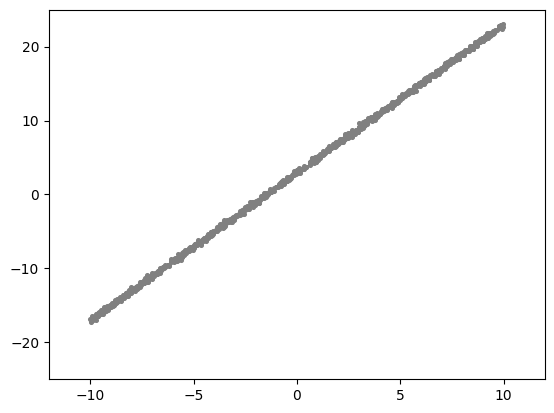

In [5]:
plt.scatter(x, y_noise, s=7, c="gray")
plt.axis([-12, 12, -25, 25])
plt.show()

In [6]:
model = nn.Linear(1,1)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
loss_arr=[]
label = y_noise

for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output,label)
  loss.backward()
  optimizer.step()
  loss_arr.append(loss.item())

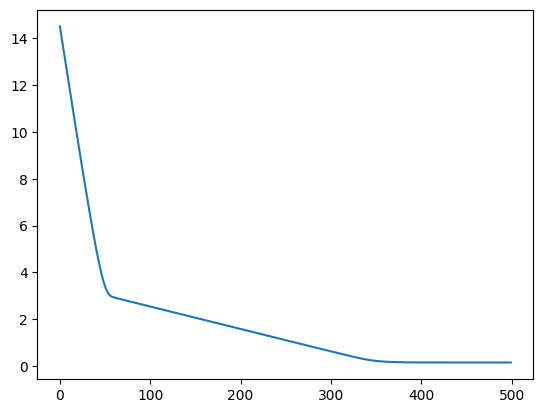

In [8]:
plt.plot(loss_arr)
plt.show()

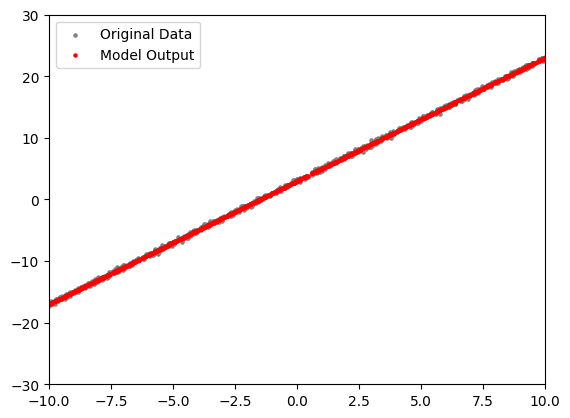

In [9]:
plt.scatter(x, y_noise, s= 5, c="gray", label ="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red",label = "Model Output")
plt.axis([-10, 10, -30, 30])
plt.legend()
plt.show()

In [10]:
param_list = list(model.parameters())
print("Weight:", param_list[0].item(), "\nBias: ", param_list[1].item())

Weight: 2.002916097640991 
Bias:  3.004467487335205


In [11]:
class LinearRegressor(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc = nn.Linear(1,1)
    
    def forward(self, x):
      y = self.fc(x)
      return y

In [12]:
model = LinearRegressor()
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

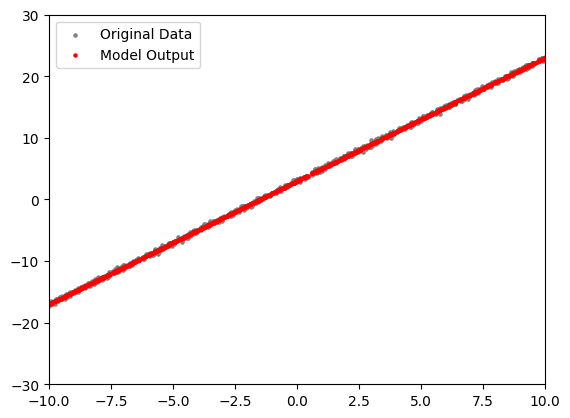

In [13]:
plt.scatter(x, y_noise, s= 5, c="gray", label ="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),s=5,c="red",label = "Model Output")
plt.axis([-10, 10, -30, 30])
plt.legend()
plt.show()

In [14]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data, 1), std=1)
x = init.uniform_(torch.Tensor(num_data,1), -15, 15)
y = (x**2)+3
y_noise = y+noise

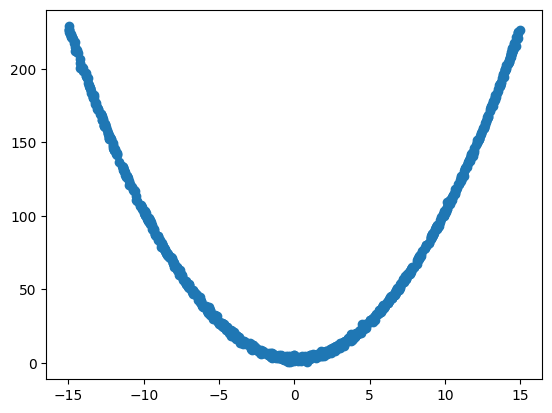

In [15]:
plt.scatter(x,y_noise)
plt.show()

In [16]:
model = nn.Sequential(
    nn.Linear(1,6),
    nn.ReLU(),
    nn.Linear(6, 10),
    nn.ReLU(),
    nn.Linear(10,6),
    nn.ReLU(),
    nn.Linear(6,1),
)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.0002)

In [17]:
loss_array = []
for i in range(num_epoch):
  optimizer.zero_grad()
  output = model(x)

  loss = loss_func(output, y_noise)
  loss.backward()
  optimizer.step()
  loss_array.append(loss.item())

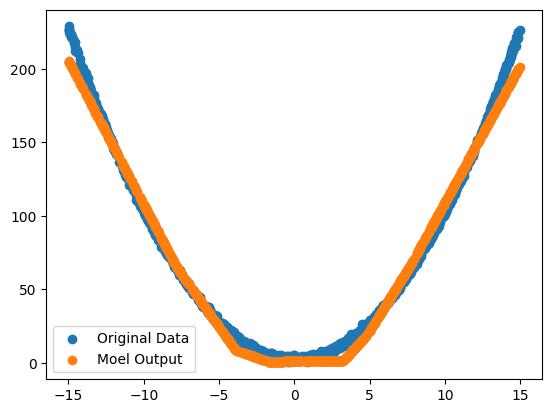

In [18]:
plt.scatter(x,y_noise,label='Original Data')
plt.scatter(x.detach().numpy(),output.detach().numpy(), label="Moel Output")
plt.legend()
plt.show()

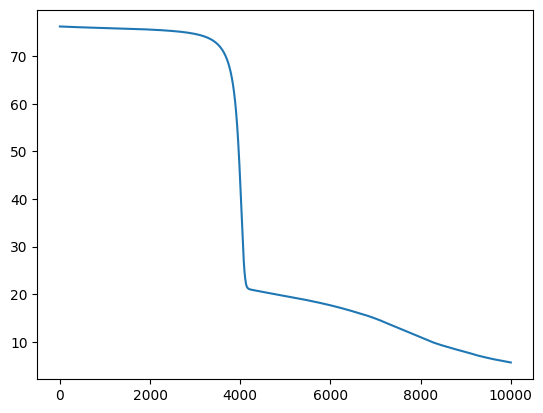

In [19]:
plt.plot(loss_array)
plt.show()

In [20]:
import torch.nn.functional as F
class Regressor(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(1,6)
    self.fc2 = nn.Linear(6, 10)
    self.fc3 = nn.Linear(10, 6)
    self.fc4 = nn.Linear(6, 1)
  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return x

In [21]:
model = Regressor()
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

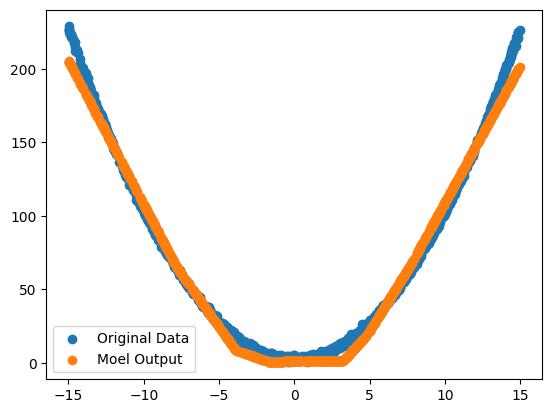

In [22]:
plt.scatter(x,y_noise,label='Original Data')
plt.scatter(x.detach().numpy(),output.detach().numpy(), label="Moel Output")
plt.legend()
plt.show()

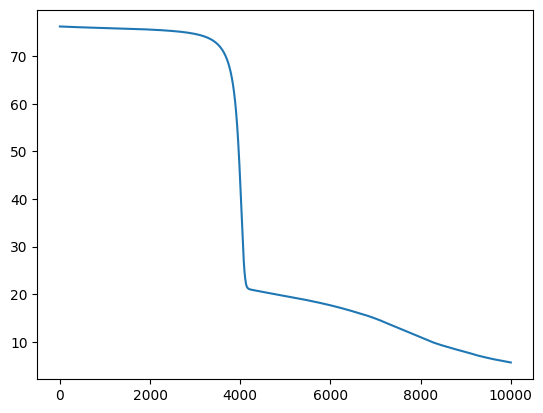

In [23]:
plt.plot(loss_array)
plt.show()

In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt

In [25]:
batch_size = 256
learning_rate=0.0002
num_epoch = 10

In [26]:
mnist_train = dset.MNIST(root="../", train=True, transform = transforms.ToTensor(), download = True)
mnist_test = dset.MNIST(root="../", train=False, transform = transforms.ToTensor(), download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 240451290.26it/s]

Extracting ../MNIST/raw/train-images-idx3-ubyte.gz to ../MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31124278.99it/s]


Extracting ../MNIST/raw/train-labels-idx1-ubyte.gz to ../MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 73808085.26it/s]


Extracting ../MNIST/raw/t10k-images-idx3-ubyte.gz to ../MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23932825.09it/s]


Extracting ../MNIST/raw/t10k-labels-idx1-ubyte.gz to ../MNIST/raw



In [27]:
train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle = True, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size = batch_size, shuffle = False, drop_last=True)

torch.Size([256, 1, 28, 28])


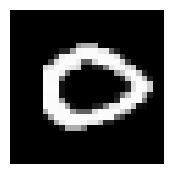

In [28]:
images, labels = next(iter(train_loader))
print(images.size())
oneshot = images[0][0,:,:]
plt.figure(figsize=(2,2))
plt.imshow(oneshot, cmap='gray')
plt.axis('off')
plt.show()

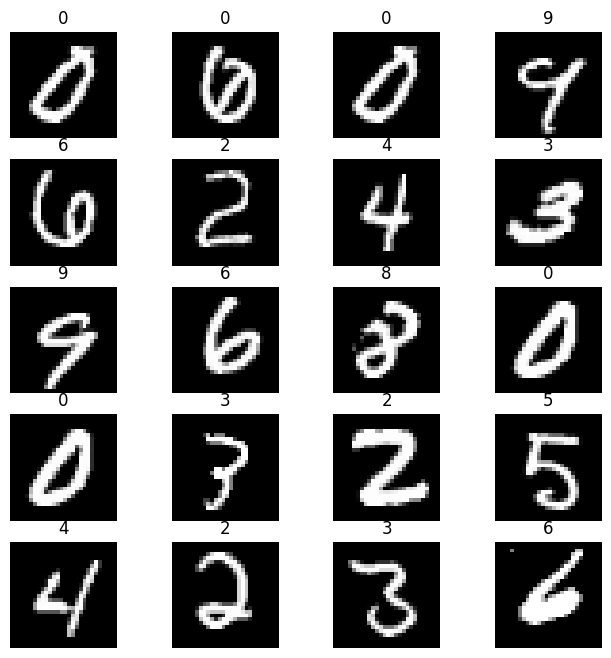

In [29]:
images, labels = next(iter(train_loader))
fig = plt.figure(figsize=(8,8))
columns = 4
rows = 5
for i in range(1, columns*rows+1):
  img_xy = np.random.randint(len(images))
  img = images[img_xy][0,:,:]
  fig.add_subplot(rows, columns, i)
  plt.title(labels[img_xy].item())
  plt.axis('off')
  plt.imshow(img, cmap='gray')
plt.show()

In [30]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels = 16, kernel_size=5),
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels = 32, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels = 64, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(64*3*3, 100),
        nn.ReLU(),
        nn.Linear(100, 100)
    )
    def forward(self, x):
      out = self.layer(x)
      out = out.view(batch_size, -1)
      out = self.fc_layer(out)
      return out

In [31]:
train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle = True, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size = batch_size, shuffle = False, drop_last=True)

In [36]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels = 16, kernel_size=5),
        nn.ReLU(),
        nn.Conv2d(in_channels=16, out_channels = 32, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2),
        nn.Conv2d(in_channels=32, out_channels = 64, kernel_size=5),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(64*3*3, 100),
        nn.ReLU(),
        nn.Linear(100, 10)
    )
  def forward(self, x):
    out = self.layer(x)
    out = out.view(batch_size, -1)
    out = self.fc_layer(out)
    return out

In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = CNN().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

cuda:0


In [38]:
print("2110147 우정은")

2110147 우정은


In [39]:
loss_arr = []
for i in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = image.to(device)
    y_ = label.to(device)

    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output, y_)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss)
      loss_arr.append(loss.cpu().detach().numpy())

tensor(2.3093, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2354, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1987, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1451, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1447, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0569, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0488, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0328, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0775, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0607, device='cuda:0', grad_fn=<NllLossBackward0>)


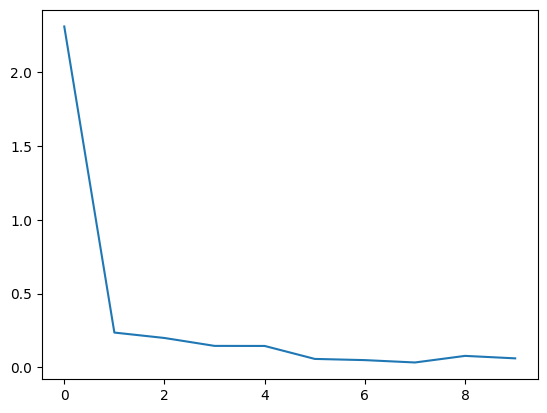

In [44]:
plt.plot(loss_arr)
plt.show()